**Help Notes**

* Graphing:

  * [add_subplot](https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.figure.Figure.html#matplotlib.figure.Figure.add_subplot), &nbsp; [.plot](https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot),  &nbsp; [.legend](https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.legend.html#matplotlib.pyplot.legend),  &nbsp; [.xlabel & .ylabel](https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.figure.Figure.html#matplotlib.figure.Figure)



* Distributions of observed values:

  * [Kernel Density Estimation Graphs](https://seaborn.pydata.org/generated/seaborn.kdeplot.html)

  * [Kernel Density Estimation](https://seaborn.pydata.org/tutorial/distributions.html#kernel-density-estimation)




* PyMC3:

  * https://docs.pymc.io/notebooks/GLM-linear.html

  * https://colcarroll.github.io/pymc3/notebooks/getting_started.html

  * [Probabilistic programming in Python using PyMC3](https://peerj.com/articles/cs-55/)

<br>

# Preliminaries

In [1]:
!rm -rf *.sh

<br>

**Packages**

In [2]:
import subprocess

In [3]:
if 'google.colab' in str(get_ipython()):
    subprocess.run('wget -q https://raw.githubusercontent.com/plausibilities/fundamentals/develop/scripts.sh', shell=True)
    subprocess.run('chmod u+x scripts.sh', shell=True)
    subprocess.run('./scripts.sh', shell=True)

<br>

**Paths**

In [4]:
import os
import pathlib
import sys

In [5]:
if not 'google.colab' in str(get_ipython()):
    
    notebooks = os.path.split(os.getcwd())[0]
    parent = str(pathlib.Path(notebooks).parent.parent)
    sys.path.append(parent)

In [6]:
pathofdiagrams = 'robust'

if not os.path.exists(path=pathofdiagrams):
    os.makedirs(pathofdiagrams)

<br>

**Libraries**

In [7]:
import arviz as az
import graphviz
import dotmap
import pymc3 as pm

import logging
import collections

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np


In [8]:
pm.__version__

'3.9.3'

<br>

Custom

In [9]:
import fundamentals.graphics.settings
import fundamentals.graphics.relational

import fundamentals.distributions.halfcauchy
import fundamentals.distributions.normal
import fundamentals.distributions.student

import fundamentals.samples.linear


<br>

**Generic Instances**

A relational graph instance, and its labels class

In [10]:
relational = fundamentals.graphics.relational.Relational()

RelationalGraphLabels = collections.namedtuple(
    typename='RelationalGraphLabels', field_names=['title', 'xlabel', 'ylabel'])

<br>

## Set-up

<br>

**Display**

If the display screen supports **retina display**, a figure's resolution can be enhanced via

In [11]:
%config InlineBackend.figure_format = 'retina'

<br>

**Aesthetics**

In [12]:
settings = fundamentals.graphics.settings.Settings()

settings.layout()
settings.aesthetics()

<br>

## Logging

In [13]:
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

<br>
<br>

# Data

Underlying model  $\: mX + c \:$ for $\: \rightarrow$

* $Y = mX + c + \mathcal{E}$

wherein

* $Y$: $N \times 1$
* $X$: $N \times 1$
* $m$: $1 \times 1$, the gradient 
* $\;\: c$: $1 \times 1$, the intercept
* $\; \mathcal{E}$: $N \times 1$, residuals | noise | errors

<br>

## Sample

Parameters for sampling

In [14]:
Parameters = collections.namedtuple(typename='Parameters', 
                                    field_names=['N', 'F', 'range', 'intercept', 'gradient', 'noiseloc', 'noisescale'])

parameters = Parameters._make([100, 100, (0, 2), 1.0, 2.0, 0.0, 0.5])

logger.info('The # of observations points\n{}\n'.format(parameters.N))
logger.info('The # of future points to predict\n{}\n'.format(parameters.F))

INFO:__main__:The # of observations points
100

INFO:__main__:The # of future points to predict
100



<br>

Hence, the sample

In [15]:
linear = fundamentals.samples.linear.Linear(parameters=parameters)

data = linear.exc()

<br>

## Illustrate

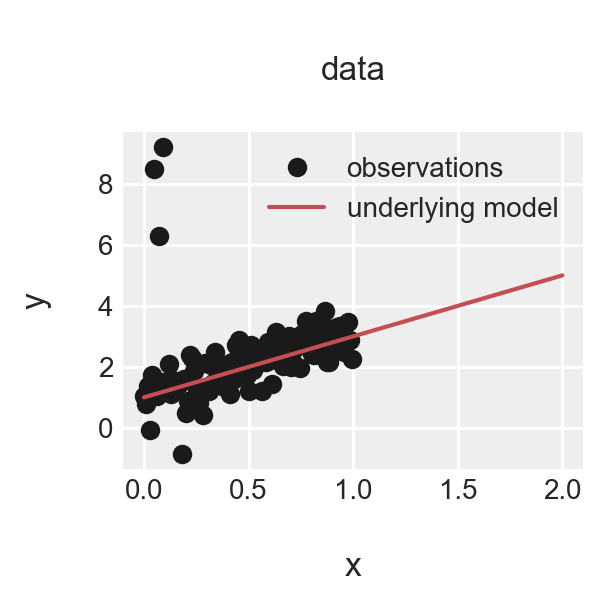

In [16]:
ax = relational.figure(width=2.9, height=2.9)
ax.plot(data.independent, data.dependent, 'ko', label='observations')
ax.plot(data.abscissae, data.ordinates, 'r-', label='underlying model')

relational.annotation(handle=ax, 
                      labels=RelationalGraphLabels._make(['\ndata\n', '\nx', 'y\n']))

ax.legend(loc='upper right', fontsize='small');

<br>

The distribution of the `y` values

* https://seaborn.pydata.org/generated/seaborn.kdeplot.html

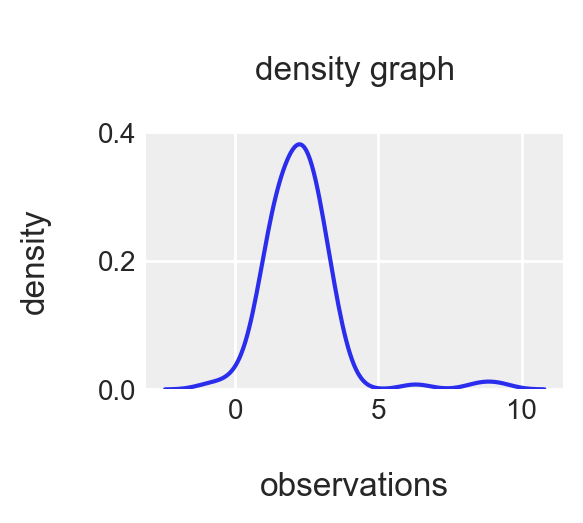

In [17]:
ax = relational.figure(width=2.8, height=2.5)
sns.kdeplot(data=data.dependent, legend=False)

relational.annotation(handle=ax, 
                      labels=RelationalGraphLabels._make(['\ndensity graph\n', '\nobservations', 'density\n']))

<br>

# Modelling

**Background knowledge:**

* Pattern Recognition & Machine Learning, Chapter 3

The predictive distribution for predicting $t$ per new value of $x$

* $p(t | x, \mathbf{t}, \alpha, \beta) = \mathcal{N} \left( t | \mathbf{m}^{T}_{N} \phi(x), \sigma^{2}_{_{N}}(x) \right)$

wherein

* $\sigma^{2}_{_{N}}(x) = \large{\frac{1}{\beta}} + \phi(x)^{T}\mathbf{S}_{N} \phi(x)$

* $\mathbf{S}^{-1}_{_{N}} = \alpha \mathbf{I} + \beta \Phi^{T}\Phi$

* $\mathbf{m}^T_{N} \phi(x) = \left( \beta \mathbf{S}_{N} \Phi^{T} \mathbf{t} \right)^{T} \phi(x)$

<br>

Noting that $\Phi$ is the design matrix

```matlab
    bsxfun(@power, trainingPoints, modelPowers)
```

<br>

**Also refer to** 

* Bayesian Reasoning & Machine Learning 2016, Chapter 18

<br>


<br>

## Priors

* https://docs.pymc.io/api/distributions.html

* https://docs.scipy.org/doc/scipy/reference/stats.html

<br>

**Half Cauchy**

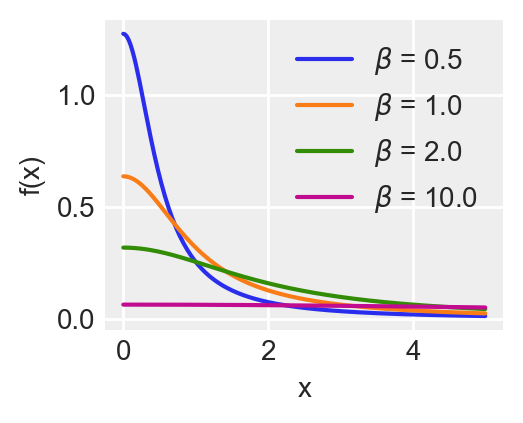

In [18]:
fundamentals.distributions.halfcauchy.HalfCauchy().draw(scales=np.array([0.5, 1.0, 2.0, 10.0]))

<br>

**Normal**

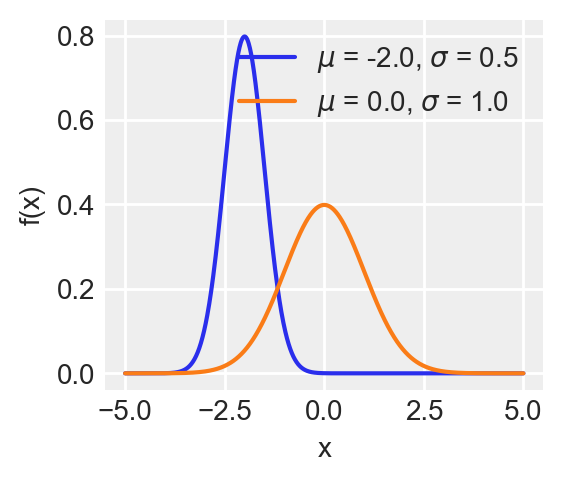

In [19]:
fundamentals.distributions.normal.Normal().draw(means=np.array([-2.0, 0]), deviations=np.array([0.5, 1]))

<br>

**Student** 

location $\mu$, scale $\sigma$, degrees of freedom $\nu$

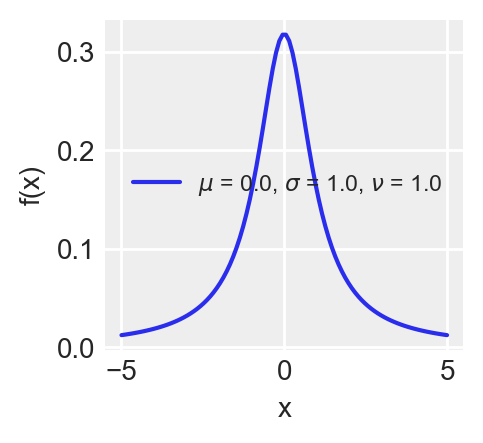

In [20]:
fundamentals.distributions.student.Student().draw(locations=np.array([0.0]), scales=np.array([1.0]), degrees=np.array([1.0]))

<br>

## Model

In [21]:
with pm.Model() as model:
    
    # Priors
    # A prior distribution for the
    #   residuals/noise/errors, sigma
    #   intercept, c
    #   gradient, m
    sigma = pm.HalfCauchy('sigma', beta=10, testval=1.0)
    intercept = pm.Normal('intercept', mu=0, sigma=20)
    gradient = pm.Normal('gradient', mu=0, sigma=20)
    degree = pm.DiscreteUniform('degree', lower=1, upper=5)

    # Define likelihood
    likelihood = pm.StudentT('y', nu=degree, mu=intercept + gradient * data.independent,
                        sigma=sigma, observed=data.dependent)

    # Inference!
    # draw posterior samples using NUTS sampling    
    trace = pm.sample(draws=3000, cores=2, tune=2000)
    maximal = pm.find_MAP()

    # The trace generated from MCMC sampling
    arviztrace = az.from_pymc3(trace=trace)


Multiprocess sampling (2 chains in 2 jobs)
INFO:pymc3:Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
INFO:pymc3:CompoundStep
>NUTS: [gradient, intercept, sigma]
INFO:pymc3:>NUTS: [gradient, intercept, sigma]
>Metropolis: [degree]
INFO:pymc3:>Metropolis: [degree]


Sampling 2 chains for 2_000 tune and 3_000 draw iterations (4_000 + 6_000 draws total) took 22 seconds.
INFO:pymc3:Sampling 2 chains for 2_000 tune and 3_000 draw iterations (4_000 + 6_000 draws total) took 22 seconds.
The number of effective samples is smaller than 25% for some parameters.
INFO:pymc3:The number of effective samples is smaller than 25% for some parameters.


<br>

**DAG**

* Pattern Recognition & Machine Learning, Chapter 8

* Either  `pm.model_to_graphviz(model=model)`  or the approach below, which can be understood via the references <br> https://www.graphviz.org/doc/info/attrs.html <br> https://graphviz.readthedocs.io/en/stable/manual.html

In [22]:
# The DAG
diagram = pm.model_graph.ModelGraph(model=model).make_graph()
diagram.node_attr.update(shape='circle')
diagram.save(os.path.join(pathofdiagrams, 'robust.gv'))

'robust\\robust.gv'

In [23]:
graphviz.render(engine='dot', format='pdf', filepath=os.path.join(pathofdiagrams, 'robust.gv'))

'robust\\robust.gv.pdf'

<br>

**Trace**

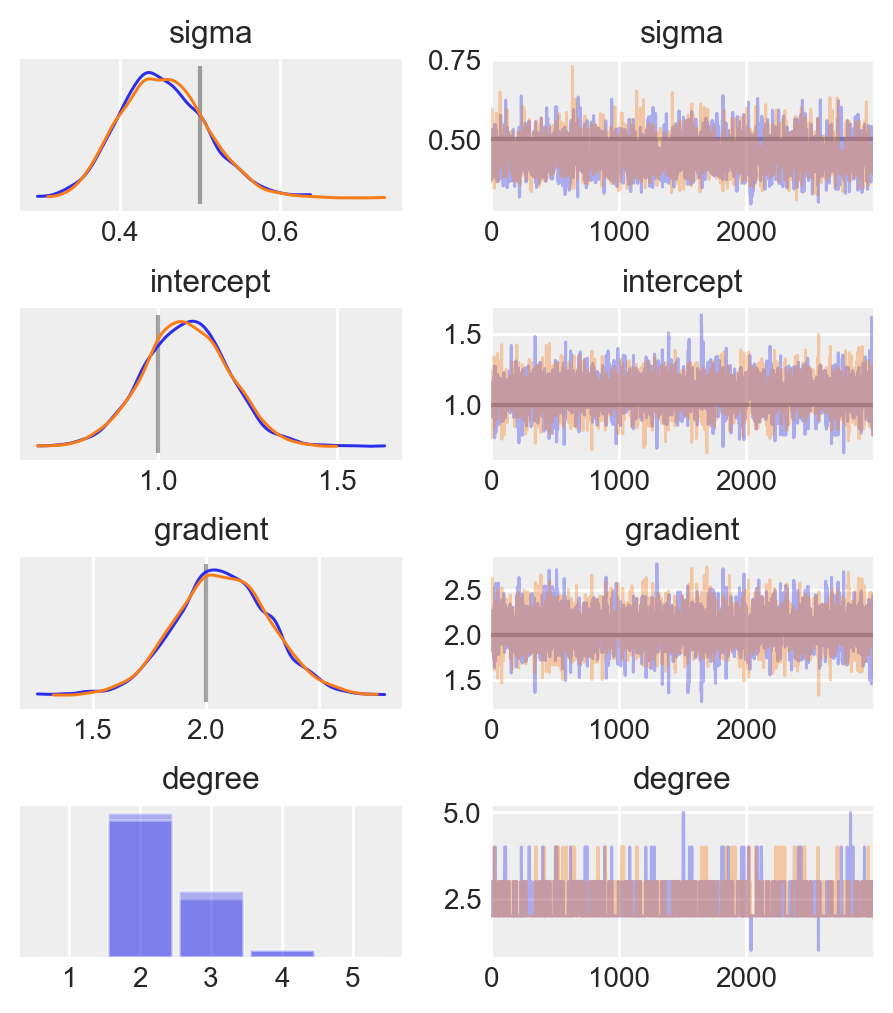

In [24]:
with model:
    az.plot_trace(data=arviztrace, var_names=['sigma', 'intercept', 'gradient', 'degree'], 
                  lines=[('sigma', {}, data.noisescale), 
                         ('intercept', {}, data.intercept), 
                         ('gradient', {}, data.gradient)], 
                  figsize=(4.35, 4.95))

In [25]:
logger.info('intercept\n{}\n'.format(trace['intercept'].shape)) 
logger.info('gradient\n{}\n'.format(trace['gradient'].shape)) 
logger.info('sigma\n{}\n'.format(trace['sigma'].shape)) 

INFO:__main__:intercept
(6000,)

INFO:__main__:gradient
(6000,)

INFO:__main__:sigma
(6000,)



<br>

## Maximum Posterior

In [26]:
maximal

{'sigma_log__': array(-0.76329775),
 'intercept': array(1.07611815),
 'gradient': array(2.07785587),
 'degree': array(3, dtype=int64),
 'sigma': array(0.46612672)}

<br>
<br>

## Estimates

There are `trace.report.n_draws` draws, and `trace.nchains` chains, $\; \therefore \:\exists$

* trace.report.n_draws * trace.nchains

estimates per parameter.  Hence, a hundred estimated regression lines w.r.t. a hundred randomly selected parameter estimates is determined via

In [27]:
samplings = trace.report.n_draws * trace.nchains

indices = np.random.randint(low=0, high=samplings, size=100)
lines = trace['intercept'][indices] + (trace['gradient'][indices] * data.abscissae)

<br>

The estimated regression line via the *mean*

In [28]:
line = trace['intercept'].mean(axis=0) + (trace['gradient'].mean(axis=0) * data.abscissae)

<br>

And, the *maximum a posteriori* regression line is

In [29]:
posterior = maximal['intercept'] + (maximal['gradient'] * data.abscissae)

<br>

Hence

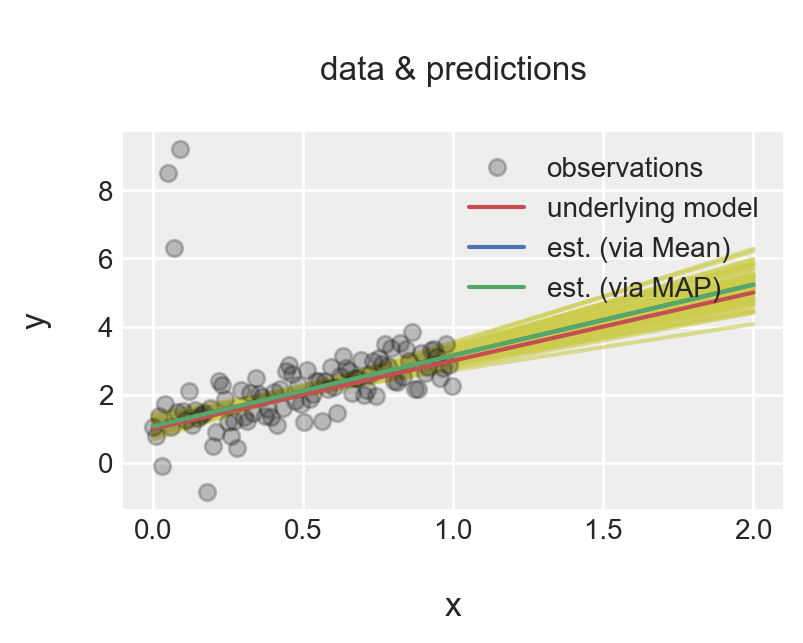

In [30]:
ax = relational.figure(width=3.9, height=3.1)

ax.plot(data.abscissae, lines, '#cccc4d', alpha=0.6, label=None)
ax.plot(data.independent, data.dependent, 'ko', alpha=0.25, label='observations')

ax.plot(data.abscissae, data.ordinates, 'r-', label='underlying model')

ax.plot(data.abscissae, line, 'b-', label='est. (via Mean)')
ax.plot(data.abscissae, posterior, 'g-', label='est. (via MAP)')

relational.annotation(handle=ax, 
                      labels=RelationalGraphLabels._make(['\ndata & predictions\n', '\nx', 'y\n']))

ax.legend(loc='upper right', fontsize='small');

# ax.set_yticks(ticks=np.arange(0, 7, 2))


<br>

## Summary

In [31]:
with model:
    summary = pm.summary(data=trace, round_to=2)

In [32]:
summary

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
intercept,1.08,0.12,0.86,1.30,0.00,0.00,2452.61,2358.91,2490.20,2582.40,1.0
gradient,2.08,0.21,1.69,2.46,0.00,0.00,2453.53,2453.53,2475.05,2371.59,1.0
degree,2.37,0.56,2.00,3.00,0.02,0.01,819.27,819.27,813.70,811.78,1.0
sigma,0.45,0.05,0.36,0.56,0.00,0.00,1904.84,1877.60,1904.98,2226.66,1.0
